In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/xy3.zip -d xy3

Archive:  gdrive/MyDrive/xy3.zip
replace xy3/ovp_x_slo.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: xy3/ovp_x_slo.npy       
  inflating: xy3/ovp_y_slo.npy       


(900, 100, 100, 13) (900, 100, 100, 9)
(720, 100, 100, 13) (180, 100, 100, 13) (720, 100, 100, 9) (180, 100, 100, 9)
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                3)]                                                               
                                                                                                  
 conv2d_88 (Conv2D)             (None, 100, 100, 64  7552        ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_89 (Conv2D)             (None, 100, 100, 64  36928       ['conv2d_

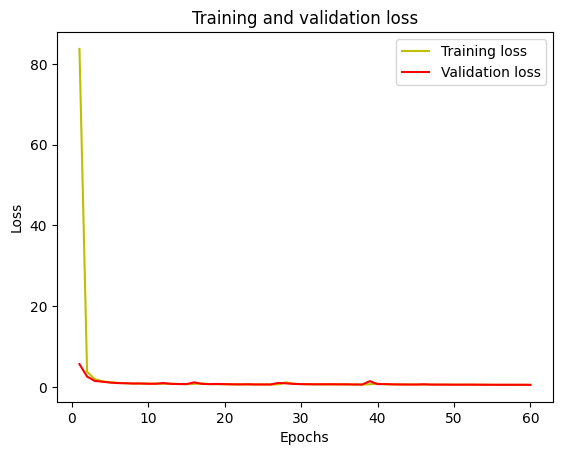

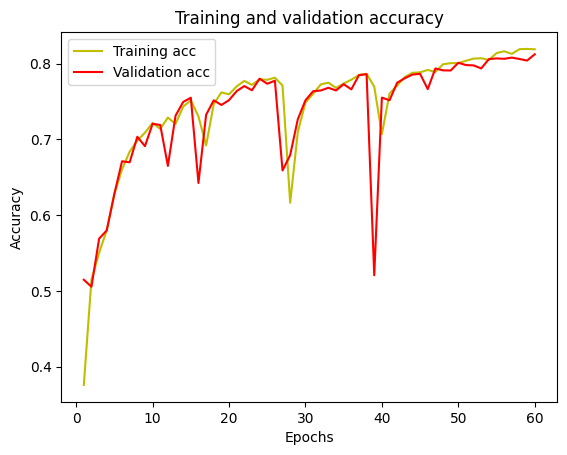

6/6 [==============================] - 0s 62ms/step - loss: 0.5262 - accuracy: 0.8125
Accuracy =  81.24516606330872 %


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Input, Conv2DTranspose, concatenate, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras

IMAGE_SIZE = 100
BATCH_SIZE = 32
N_CLASSES = 9

_x = np.load("xy/ovp_x_slo.npy")
_y = np.load("xy/ovp_y_slo.npy")
print(_x.shape, _y.shape)
                                                                        
x_train, x_test, y_train, y_test = train_test_split(_x, _y, shuffle=True, random_state=6, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

def build_unet(input_shape, num_classes):
    # Input layer
    inputs = Input(input_shape)

    # Contracting path (downsampling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottom layer
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Expanding path (upsampling)
    up4 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv3)
    up4 = concatenate([up4, conv2], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv4)
    up5 = concatenate([up5, conv1], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Output layer
    output = Conv2D(num_classes, 1, activation='softmax')(conv5)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

model = build_unet(x_train.shape[1:], N_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_test, y_test), batch_size=BATCH_SIZE)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

In [ ]:
y_pred = model.predict(x_test)
flat_y_pred = []
flat_y_test = []
for (it1, it2) in zip(y_pred, y_test):
  for (i1, i2) in zip(it1, it2):
    for (j1, j2) in zip(i1, i2):
      flat_y_pred.append(np.argmax(j1))
      flat_y_test.append(np.argmax(j2))
flat_y_pred = np.array(flat_y_pred)
flat_y_test = np.array(flat_y_test)
print(flat_y_pred.shape, flat_y_test.shape)

6/6 [==============================] - 1s 65ms/step
(1800000,) (1800000,)


In [1]:
print(y_pred.shape, y_test.shape)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(flat_y_test, flat_y_pred)
print(cm)

[[617312     72    631      0      0   1852  11410   2231      5]
 [   592   5081    728     13      1   1173   2193   1514      5]
 [  8350    217   4149      3      0   2528  12024   7409      7]
 [    71      5      2     27      0      2     26     12      2]
 [     0      0      0      0      0      0      0      0      0]
 [  7317    111    407      0      0 195154  22727  25999     52]
 [ 22073     93   1066      1      0  17638 341489  65702     25]
 [  5970    114    433      0      0  13667  90552 299132     22]
 [   933     21     65      0      0   3154   3751   2616     69]]


In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(flat_y_test, flat_y_pred)
print(cr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95    633513
           1       0.89      0.45      0.60     11300
           2       0.55      0.12      0.20     34687
           3       0.61      0.18      0.28       147
           4       0.00      0.00      0.00         0
           5       0.83      0.78      0.80    251767
           6       0.71      0.76      0.73    448087
           7       0.74      0.73      0.73    409890
           8       0.37      0.01      0.01     10609

    accuracy                           0.81   1800000
   macro avg       0.63      0.44      0.48   1800000
weighted avg       0.81      0.81      0.80   1800000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("the_model")

In [ ]:
!zip -r the_model.zip the_model

updating: the_model/ (stored 0%)
updating: the_model/assets/ (stored 0%)
updating: the_model/saved_model.pb (deflated 90%)
updating: the_model/fingerprint.pb (stored 0%)
updating: the_model/variables/ (stored 0%)
updating: the_model/variables/variables.index (deflated 71%)
updating: the_model/variables/variables.data-00000-of-00001 (deflated 6%)
updating: the_model/keras_metadata.pb (deflated 94%)


In [ ]:
from google.colab import files
files.download("/content/the_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>